In [18]:
!pip install nltk

In [21]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from collections import Counter
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [57]:
df = pd.read_csv("data.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [11]:
df.drop_duplicates(inplace=True)
df.reset_index()

,index,review,sentiment
0,0,One of the other reviewers has mentioned that ...,positive
1,1,A wonderful little production. <br /><br />The...,positive
2,2,I thought this was a wonderful way to spend ti...,positive
3,3,Basically there's a family where a little boy ...,negative
4,4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...,...
49577,49995,I thought this movie did a down right good job...,positive
49578,49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49579,49997,I am a Catholic taught in parochial elementary...,negative
49580,49998,I'm going to have to disagree with the previou...,negative


In [12]:
def clean_text(text):
    text = re.sub('<[^<]+?>', '', text)
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    return text

In [13]:
df.loc[:, 'review'] = df['review'].apply(clean_text)

In [14]:
df = df.reset_index(drop=True)
df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
...,...,...
49577,i thought this movie did a down right good job...,positive
49578,bad plot bad dialogue bad acting idiotic direc...,negative
49579,i am a catholic taught in parochial elementary...,negative
49580,im going to have to disagree with the previous...,negative


In [22]:
review = df.review.apply(lambda x : word_tokenize(x))
target = df.sentiment

In [23]:
vocab = Counter(word for element in review for word in element)

In [24]:
vocab = {word : idx + 1 for idx, (word, _) in enumerate(vocab.most_common())}


In [25]:
vocab

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'in': 7,
 'it': 8,
 'i': 9,
 'this': 10,
 'that': 11,
 'was': 12,
 'as': 13,
 'with': 14,
 'for': 15,
 'movie': 16,
 'but': 17,
 'film': 18,
 'on': 19,
 'not': 20,
 'you': 21,
 'are': 22,
 'his': 23,
 'have': 24,
 'be': 25,
 'he': 26,
 'one': 27,
 'its': 28,
 'at': 29,
 'all': 30,
 'by': 31,
 'an': 32,
 'they': 33,
 'who': 34,
 'from': 35,
 'like': 36,
 'so': 37,
 'or': 38,
 'just': 39,
 'her': 40,
 'about': 41,
 'has': 42,
 'out': 43,
 'if': 44,
 'some': 45,
 'what': 46,
 'there': 47,
 'good': 48,
 'more': 49,
 'very': 50,
 'when': 51,
 'even': 52,
 'up': 53,
 'no': 54,
 'my': 55,
 'would': 56,
 'can': 57,
 'she': 58,
 'time': 59,
 'which': 60,
 'only': 61,
 'really': 62,
 'their': 63,
 'see': 64,
 'were': 65,
 'story': 66,
 'had': 67,
 'me': 68,
 'than': 69,
 'much': 70,
 'we': 71,
 'well': 72,
 'been': 73,
 'get': 74,
 'will': 75,
 'other': 76,
 'into': 77,
 'great': 78,
 'do': 79,
 'bad': 80,
 'because': 81,
 'also': 82,

In [26]:
encoded = [[vocab[word] for word in element if word in vocab] for element in review]


In [53]:
len(encoded)

49582

In [28]:
len(encoded[0])

300

In [29]:
len(encoded[1])

156

In [30]:
MAX_LEN = 100

In [31]:
padded_review = pad_sequences(encoded, maxlen = MAX_LEN, padding = 'post', truncating = 'post')
padded_review

array([[  27,    4,    1, ..., 6648, 2504, 1052],
       [   3,  380,  115, ...,    1, 1855,   62],
       [   9,  192,   10, ...,  149, 2940,    9],
       ...,
       [   9,  224,    3, ...,  124,  110,    4],
       [ 143,  161,    5, ..., 8368, 5410,    2],
       [  54,   27, 5639, ...,  286,  318,   34]], dtype=int32)

In [32]:
padded_review.shape

(49582, 100)

In [33]:
label_encoder = LabelEncoder()

In [34]:
encoded_target = label_encoder.fit_transform(target)
encoded_target

array([1, 1, 1, ..., 0, 0, 0])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(padded_review, encoded_target, test_size = 0.2, random_state = 42)

In [36]:
X_train_tensor = torch.tensor(X_train, dtype=torch.long)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [37]:
train_data = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
test_data = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)

In [38]:
BATCH_SIZE = 32
train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=BATCH_SIZE)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE)

In [39]:
class RNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):
        super().__init__()

        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, num_layers=n_layers,
                          bidirectional=bidirectional, dropout=dropout, batch_first=True)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):
        embedded = self.dropout(self.embedding(text))
        output, hidden = self.rnn(embedded)

        if self.rnn.bidirectional:
            hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim=1)
        else:
            hidden = hidden[-1,:,:]
        output = self.fc(hidden)
        return output

In [40]:
VOCAB_SIZE = len(vocab) + 1
EMBEDDING_DIM = 100
HIDDEN_DIM = 128
OUTPUT_DIM = 1
N_LAYERS = 2
BIDIRECTIONAL = True
DROPOUT = 0.5

model = RNN(VOCAB_SIZE, EMBEDDING_DIM, HIDDEN_DIM, OUTPUT_DIM, N_LAYERS, BIDIRECTIONAL, DROPOUT)

model

RNN(
  (embedding): Embedding(215440, 100)
  (rnn): RNN(100, 128, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [41]:
optimizer = optim.Adam(model.parameters())

In [42]:
criterion = nn.BCEWithLogitsLoss()

In [43]:
def binary_accuracy(preds, y):
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc

In [44]:
def train(model, iterator, optimizer, criterion):
    model.train()
    epoch_loss = 0
    epoch_acc = 0

    for batch in iterator:
        optimizer.zero_grad()
        text, labels = batch
        text = text.to(device)
        labels = labels.to(device)

        predictions = model(text).squeeze(1)
        loss = criterion(predictions, labels)
        acc = binary_accuracy(predictions, labels)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [45]:
def evaluate(model, iterator, criterion):
    model.eval()
    epoch_loss = 0
    epoch_acc = 0

    with torch.no_grad():
        for batch in iterator:
            text, labels = batch
            text = text.to(device)
            labels = labels.to(device)

            predictions = model(text).squeeze(1)
            loss = criterion(predictions, labels)
            acc = binary_accuracy(predictions, labels)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [46]:
def predict_sentiment(model, sentence, vocab, max_len):
    model.eval()

    tokenized = word_tokenize(sentence.lower())
    indexed = [vocab[word] for word in tokenized if word in vocab]
    padded = pad_sequences([indexed], maxlen=max_len, padding='post', truncating='post')

    tensor = torch.LongTensor(padded).to(device)

    prediction = torch.sigmoid(model(tensor))
    return prediction.item()

In [47]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = criterion.to(device)

In [48]:
N_EPOCHS = 20
train_losses = []
train_accuracies = []
valid_losses = []
valid_accuracies = []

for epoch in range(N_EPOCHS):
    train_loss, train_acc = train(model, train_loader, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, test_loader, criterion)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    valid_losses.append(valid_loss)
    valid_accuracies.append(valid_acc)

    print(f'Epoch: {epoch+1}')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\tVal. Loss: {valid_loss:.3f} | Val. Acc: {valid_acc*100:.2f}%')

print("Training complete.")

Epoch: 1
	Train Loss: 0.693 | Train Acc: 53.52%
	Val. Loss: 0.692 | Val. Acc: 57.03%
Epoch: 2
	Train Loss: 0.686 | Train Acc: 54.98%
	Val. Loss: 0.687 | Val. Acc: 55.10%
Epoch: 3
	Train Loss: 0.678 | Train Acc: 57.59%
	Val. Loss: 0.673 | Val. Acc: 58.47%
Epoch: 4
	Train Loss: 0.674 | Train Acc: 58.09%
	Val. Loss: 0.672 | Val. Acc: 59.18%
Epoch: 5
	Train Loss: 0.662 | Train Acc: 60.31%
	Val. Loss: 0.631 | Val. Acc: 65.10%
Epoch: 6
	Train Loss: 0.661 | Train Acc: 59.81%
	Val. Loss: 0.677 | Val. Acc: 57.20%
Epoch: 7
	Train Loss: 0.646 | Train Acc: 62.62%
	Val. Loss: 0.588 | Val. Acc: 69.80%
Epoch: 8
	Train Loss: 0.624 | Train Acc: 65.70%
	Val. Loss: 0.575 | Val. Acc: 70.29%
Epoch: 9
	Train Loss: 0.617 | Train Acc: 66.14%
	Val. Loss: 0.636 | Val. Acc: 64.30%
Epoch: 10
	Train Loss: 0.589 | Train Acc: 68.84%
	Val. Loss: 0.609 | Val. Acc: 65.95%
Epoch: 11
	Train Loss: 0.549 | Train Acc: 72.37%
	Val. Loss: 0.510 | Val. Acc: 75.53%
Epoch: 12
	Train Loss: 0.616 | Train Acc: 65.92%
	Val. Loss: 0.

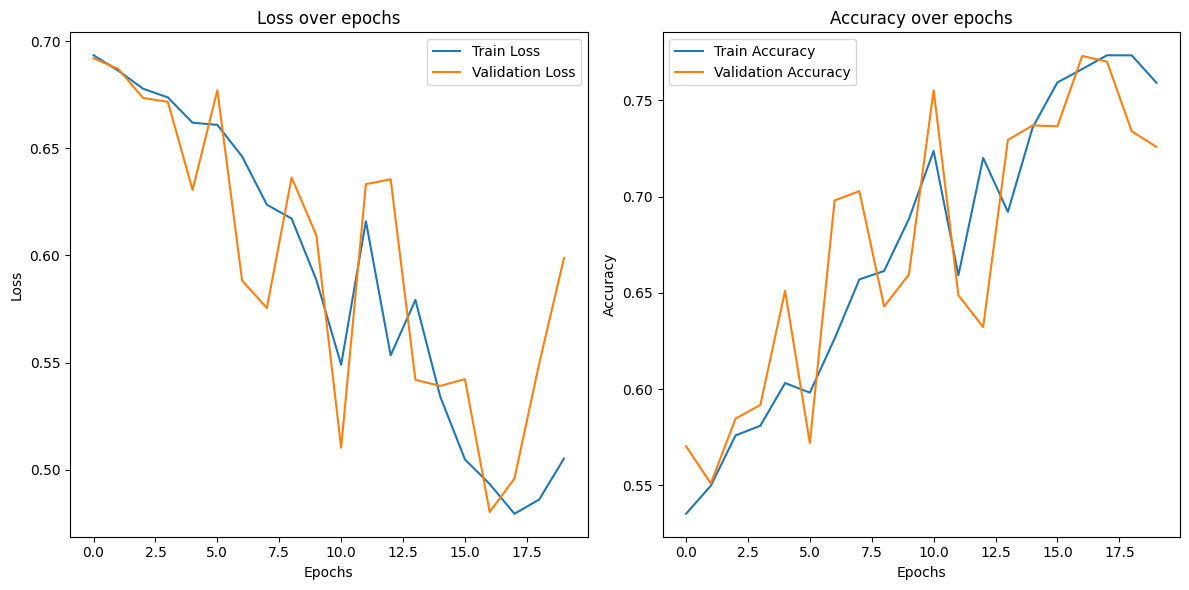

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(valid_accuracies, label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()

plt.show()

In [50]:
text1 = "The Story of Us is a beautifully crafted film with heartfelt performances, stunning visuals, and an emotional score. A must-watch that leaves you inspired and uplifted!"
text2 = "The Story of Us is predictable and dull, with shallow characters and a sluggish pace. It fails to engage or evoke any genuine emotions."

In [60]:
predicted_sentiment = predict_sentiment(model, text1, vocab, MAX_LEN)
print(predicted_sentiment)
ans = 1 if predicted_sentiment >= 0.6 else 0
ans = np.array([ans])
print(f"Predicted sentiment for the sentence: {label_encoder.inverse_transform(ans)}")

0.879703938961029
Predicted sentiment for the sentence: ['positive']


In [61]:
predicted_sentiment = predict_sentiment(model, text2, vocab, MAX_LEN)
print(predicted_sentiment)
ans = 1 if predicted_sentiment >= 0.6 else 0
ans = np.array([ans])
print(f"Predicted sentiment for the sentence: {label_encoder.inverse_transform(ans)}")

0.5795952081680298
Predicted sentiment for the sentence: ['negative']
